In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import datasets , layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train , y_train ),(x_test , y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(x,y,index):
 plt.figure(figsize=(15,2))
 plt.imshow(x_train[0])
 plt.xlabel(classes[y[index]])

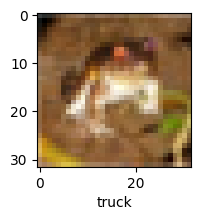

In [ ]:
plot_sample(x_train,y_train,1)

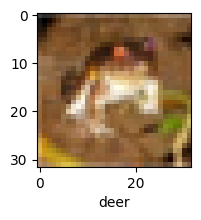

In [ ]:
plot_sample(x_train,y_train,3)

In [ ]:
x_train = x_train/255
x_test =x_test/255

In [ ]:
#model building
ann = models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(x_train  , y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 295s 188ms/step - loss: 1.8830 - accuracy: 0.3301
Epoch 2/5
1563/1563 [==============================] - 330s 211ms/step - loss: 1.6560 - accuracy: 0.4082
Epoch 3/5
1563/1563 [==============================] - 315s 202ms/step - loss: 1.5855 - accuracy: 0.4336
Epoch 4/5
1563/1563 [==============================] - 325s 208ms/step - loss: 1.5407 - accuracy: 0.4510
Epoch 5/5
1563/1563 [==============================] - 325s 208ms/step - loss: 1.5034 - accuracy: 0.4600


In [14]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 13s 39ms/step - loss: 1.5320 - accuracy: 0.4551


[1.5320404767990112, 0.45509999990463257]

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report \n ",classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 30ms/step
classification report 
                precision    recall  f1-score   support

           0       0.44      0.56      0.49      1000
           1       0.55      0.63      0.59      1000
           2       0.33      0.27      0.29      1000
           3       0.41      0.21      0.28      1000
           4       0.37      0.47      0.41      1000
           5       0.41      0.32      0.36      1000
           6       0.51      0.44      0.47      1000
           7       0.60      0.41      0.49      1000
           8       0.45      0.72      0.56      1000
           9       0.48      0.52      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.44     10000
weighted avg       0.46      0.46      0.44     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4615 - accuracy: 0.4743
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1097 - accuracy: 0.6116
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9824 - accuracy: 0.6593
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8959 - accuracy: 0.6911
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8254 - accuracy: 0.7131
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7663 - accuracy: 0.7324
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7195 - accuracy: 0.7479
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6699 - accuracy: 0.7672
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6285 - accuracy: 0.7808
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In [34]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 10s 30ms/step


array([[2.0293421e-03, 5.1416439e-04, 3.6526140e-04, 8.6921209e-01,
        4.4767018e-03, 8.8194922e-02, 8.0271723e-04, 1.2069540e-03,
        3.3155378e-02, 4.2455678e-05],
       [3.0545047e-02, 1.1115629e-01, 7.1762348e-05, 9.7146458e-06,
        1.1642214e-06, 5.8654088e-08, 1.0169367e-06, 9.8746932e-07,
        8.5274947e-01, 5.4645436e-03],
       [1.9013616e-01, 2.5755042e-01, 6.6300798e-03, 1.9381365e-02,
        5.6526195e-03, 6.8199571e-04, 5.0516007e-04, 4.7908556e-03,
        4.8821661e-01, 2.6454750e-02],
       [9.1656423e-01, 2.3537663e-04, 5.9862301e-02, 3.1771077e-04,
        3.8898754e-04, 3.6620422e-06, 4.4266009e-05, 2.7303529e-05,
        2.2516556e-02, 3.9732768e-05],
       [2.5344148e-06, 4.3788731e-07, 1.1301543e-02, 9.9870022e-03,
        1.8589835e-01, 4.3019499e-03, 7.8850102e-01, 5.3266799e-06,
        1.5733447e-06, 3.1311291e-07]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

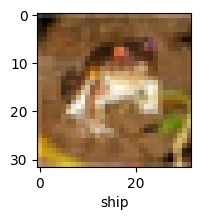

In [41]:
plot_sample(x_test, y_test,1)

In [42]:
classes[y_classes[1]]

'ship'

In [44]:
print("classification report :\n", classification_report(y_test , y_classes))

classification report :
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.85      0.77      0.80      1000
           2       0.57      0.60      0.58      1000
           3       0.53      0.52      0.52      1000
           4       0.69      0.59      0.64      1000
           5       0.57      0.65      0.61      1000
           6       0.77      0.79      0.78      1000
           7       0.74      0.76      0.75      1000
           8       0.77      0.82      0.79      1000
           9       0.81      0.76      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

